In [85]:
from pymongo import MongoClient
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

## Assemble data and mount dataframe

First we need to get all the data from mongodb and mount in a dataframe so its easier to work with

In [86]:
# Creating connection to the DB
conn = MongoClient('localhost', 27017)
db = conn.nbascrapper
players_collection = db.players
players_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'nbascrapper'), 'players')

In [87]:
dfs = []
# Unpack json array to df
def json_to_df(row, json_col):
    try:
        json_df = pd.DataFrame(row[json_col])
        dfs.append(json_df.assign(**row.drop(json_col)))
    except Exception as e:
        print(e)
        print(row[json_col])
        time.sleep(0.1)

In [88]:
# Getting all 'Career Regular Season Stats' from players
query_filter = { 
        "stats": 
        {
            "$not":
            {
                "$eq":{}
            }
        },
        "$or":[
            {
                "stats.Career Regular Season Stats": 
                {
                        "$exists": True
                }
            },
            {
                "stats.Traditional Splits": 
                {
                        "$exists": True
                }
            },
        ]
    }

query_project = {
    '_id': 0,
    'name': 1,
    'position': 1,
    'stats.Career Regular Season Stats': 1,
    'stats.Traditional Splits': 1
}

data = list(players_collection.find(query_filter, query_project))

df_unpacked = pd.io.json.json_normalize(data)
df_unpacked['stats'] = df_unpacked['stats.Career Regular Season Stats'].combine_first(df_unpacked['stats.Traditional Splits'])
del df_unpacked['stats.Career Regular Season Stats']
del df_unpacked['stats.Traditional Splits']
dfs = []
df_unpacked.apply(json_to_df, axis=1, json_col='stats')

players = pd.concat(dfs)

DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan
DataFrame constructor not properly called!
nan


/media/lucas/DATA/Repos/nba_scrapper/venv/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Analysing dataframe

In [89]:
print(f'Nº Players: {len(players)}')
print(f'Nº Columns: {len(list(players))}')
print(f'Columns: {list(players)}')
players.drop_duplicates(subset=['name', 'TEAM','Season'], keep='first')
players.head()

Nº Players: 27167
Nº Columns: 88
Columns: ['%3PA', '%3PM', '%AST', '%BLK', '%BLKA', '%DREB', '%FGA', '%FGA  2PT', '%FGA  3PT', '%FGM', '%FTA', '%FTM', '%OREB', '%PF', '%PFD', '%PTS', '%PTS  2PT', '%PTS  2PT\xa0MR', '%PTS  3PT', '%PTS  FBPs', '%PTS  FT', '%PTS  OffTO', '%PTS  PITP', '%REB', '%STL', '%TOV', '+/-', '2FGM  %AST', '2FGM  %UAST', '2nd\xa0PTS', '3FGM  %AST', '3FGM  %UAST', '3P%', '3PA', '3PM', 'AGE', 'AST', 'AST Ratio', 'AST%', 'AST/TO', 'BLK', 'BLKA', 'By Year', 'DD2', 'DREB', 'DREB%', 'DefRtg', 'FBPs', 'FG%', 'FGA', 'FGM', 'FGM  %AST', 'FGM  %UAST', 'FP', 'FT%', 'FTA', 'FTM', 'GP', 'GS', 'MIN', 'NetRtg', 'OREB', 'OREB%', 'OffRtg', 'Opp  2nd\xa0PTS', 'Opp  FBPs', 'Opp  PITP', 'Opp  PTS\xa0OFF\xa0TO', 'PACE', 'PF', 'PFD', 'PIE', 'PITP', 'PTS', 'PTS\xa0OFF\xa0TO', 'REB', 'REB%', 'STL', 'Season', 'TD3', 'TEAM', 'TO Ratio', 'TOV', 'TS%', 'USG%', 'eFG%', 'name', 'position']


,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,Season,TD3,TEAM,TO Ratio,TOV,TS%,USG%,eFG%,name,position
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1994-95,NaN,SAC,NaN,0.8,NaN,NaN,NaN,Alaa Abdelnaby,F
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1994-95,NaN,PHL,NaN,1.7,NaN,NaN,NaN,Alaa Abdelnaby,F
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1994-95,NaN,TOT,NaN,0.8,NaN,NaN,NaN,Alaa Abdelnaby,F
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993-94,NaN,BOS,NaN,1.3,NaN,NaN,NaN,Alaa Abdelnaby,F
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1992-93,NaN,MIL,NaN,1.1,NaN,NaN,NaN,Alaa Abdelnaby,F


In [90]:
# Fixing column names
players.columns = [col.replace('\xa0', '').replace('  ', '').replace(' ', '') for col in players.columns]
print(f'Columns: {list(players)}')

Columns: ['%3PA', '%3PM', '%AST', '%BLK', '%BLKA', '%DREB', '%FGA', '%FGA2PT', '%FGA3PT', '%FGM', '%FTA', '%FTM', '%OREB', '%PF', '%PFD', '%PTS', '%PTS2PT', '%PTS2PTMR', '%PTS3PT', '%PTSFBPs', '%PTSFT', '%PTSOffTO', '%PTSPITP', '%REB', '%STL', '%TOV', '+/-', '2FGM%AST', '2FGM%UAST', '2ndPTS', '3FGM%AST', '3FGM%UAST', '3P%', '3PA', '3PM', 'AGE', 'AST', 'ASTRatio', 'AST%', 'AST/TO', 'BLK', 'BLKA', 'ByYear', 'DD2', 'DREB', 'DREB%', 'DefRtg', 'FBPs', 'FG%', 'FGA', 'FGM', 'FGM%AST', 'FGM%UAST', 'FP', 'FT%', 'FTA', 'FTM', 'GP', 'GS', 'MIN', 'NetRtg', 'OREB', 'OREB%', 'OffRtg', 'Opp2ndPTS', 'OppFBPs', 'OppPITP', 'OppPTSOFFTO', 'PACE', 'PF', 'PFD', 'PIE', 'PITP', 'PTS', 'PTSOFFTO', 'REB', 'REB%', 'STL', 'Season', 'TD3', 'TEAM', 'TORatio', 'TOV', 'TS%', 'USG%', 'eFG%', 'name', 'position']


#### Columns description (As described in https://stats.nba.com/help/glossary/)

In [91]:
# Print all text in column
pd.options.display.max_colwidth = 200

query_project = {
    '_id': 0
}

glossary_collection = db.glossary
glossary = pd.DataFrame(list(glossary_collection.find({},query_project)))
glossary['Key'] = glossary['Key'].str.upper()
glossary['Key'] = glossary['Key'].str.replace(' ', '')
glossary.set_index('Key', inplace=True)
glossary.fillna('', inplace=True)

for column in list(players):
    try:
        name = glossary.loc[column.upper()]["Definition"]
    except KeyError:
        name = "Not in list!"
    
    print('|----------------------------------------------------------------------------------------------------------------|')
    print(f'|{column}: {name}')
    print('|----------------------------------------------------------------------------------------------------------------|')

|----------------------------------------------------------------------------------------------------------------|
|%3PA: The percentage of a team's 3 point field goals attempted that a player has while on the court  
|----------------------------------------------------------------------------------------------------------------|
|----------------------------------------------------------------------------------------------------------------|
|%3PM: The percentage of a team's 3 point field goals that a player has made while on the court  
|----------------------------------------------------------------------------------------------------------------|
|----------------------------------------------------------------------------------------------------------------|
|%AST: The percentage of a team's assists that a player has while on the court  
|----------------------------------------------------------------------------------------------------------------|
|---------------------------

In [92]:
print(players[['Season', 'ByYear', 'GS']])
players[['Season', 'ByYear', 'GS']].describe()

      Season   ByYear    GS
0    1994-95      NaN     0
1    1994-95      NaN     0
2    1994-95      NaN     0
3    1993-94      NaN     0
4    1992-93      NaN     0
5    1992-93      NaN    52
6    1992-93      NaN    52
7    1991-92      NaN     1
8    1990-91      NaN     0
9   Overall:      NaN    53
0    1977-78      NaN   NaN
1    1977-78      NaN   NaN
2    1977-78      NaN   NaN
3    1976-77      NaN   NaN
4    1975-76      NaN   NaN
5    1974-75      NaN   NaN
6    1973-74      NaN   NaN
7    1972-73      NaN   NaN
8    1971-72      NaN   NaN
9    1970-71      NaN   NaN
10   1969-70      NaN   NaN
11   1968-69      NaN   NaN
12   1968-69      NaN   NaN
13   1968-69      NaN   NaN
14  Overall:      NaN   NaN
0    1988-89      NaN    74
1    1987-88      NaN    80
2    1986-87      NaN    78
3    1985-86      NaN    79
4    1984-85      NaN    79
5    1983-84      NaN    80
6    1982-83      NaN    79
7    1981-82      NaN    76
8    1980-81      NaN    80
9    1979-80      Na

,Season,ByYear,GS
count,17895,9272,10154
unique,71,24,459
top,Overall:,2018-19,0
freq,2586,602,2601


In [93]:
players.describe()

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA2PT,%FGA3PT,%FGM,...,PFD,PIE,PITP,PTSOFFTO,REB%,TD3,TORatio,TS%,USG%,eFG%
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,273.000000,273.000000,3.000000,...,577.000000,59.000000,577.000000,577.000000,59.000000,8360.000000,59.000000,59.000000,62.000000,59.000000
mean,31.300000,29.066667,33.700000,2.933333,21.133333,15.50000,23.833333,73.901832,23.900733,20.966667,...,1.502946,10.023729,3.891161,1.370711,9.464407,0.085048,9.806780,52.066102,21.609677,47.950847
std,5.892368,9.016282,24.517137,2.950141,18.972700,1.74356,9.707901,25.296539,23.013059,11.386981,...,1.323036,5.125203,3.052590,0.991575,3.480624,0.907132,3.709162,11.630098,5.256119,10.418789
min,24.900000,22.800000,5.400000,0.000000,0.000000,13.50000,13.100000,0.000000,0.000000,8.400000,...,0.000000,-15.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,28.700000,23.900000,26.300000,1.450000,13.350000,14.90000,19.750000,58.100000,1.900000,16.150000,...,0.500000,9.250000,1.600000,0.600000,8.000000,0.000000,7.600000,51.850000,18.175000,48.450000
50%,32.500000,25.000000,47.200000,2.900000,26.700000,16.30000,26.400000,81.400000,17.700000,23.900000,...,1.200000,11.300000,3.100000,1.200000,9.200000,0.000000,9.700000,55.000000,21.400000,50.200000
75%,34.500000,32.200000,47.850000,4.400000,31.700000,16.50000,29.200000,97.700000,39.900000,27.250000,...,2.200000,12.800000,5.500000,1.900000,10.750000,0.000000,11.450000,56.750000,23.750000,52.900000
max,36.500000,39.400000,48.500000,5.900000,36.700000,16.70000,32.000000,100.000000,100.000000,30.600000,...,6.800000,16.000000,13.100000,4.500000,25.000000,42.000000,25.000000,62.000000,34.000000,56.400000


## Cleaning dataframe

In [94]:
players2 = players.copy()
cols_keep = ['name','Season','By Year','TEAM','GP','MIN','PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%',
             'OREB','DREB','REB','AST','TOV','STL','BLK','PF','FP','DD2','TD3','+/-']
cols_float = ['GP','MIN','PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%',
             'OREB','DREB','REB','AST','TOV','STL','BLK','PF','FP','DD2','TD3','+/-']
players2['Season'] = players2['Season'].combine_first(players2['ByYear'])
players2[players2['name'].str.contains('Bob Pettit')][['Season','name','TEAM']].sort_values('Season').head()

,Season,name,TEAM
10,1954-55,Bob Pettit,MIH
9,1955-56,Bob Pettit,STL
8,1956-57,Bob Pettit,STL
7,1957-58,Bob Pettit,STL
6,1958-59,Bob Pettit,STL


In [95]:
# Convert columns to right type, deleting columns
print(players2.columns)
for col in players2:
    if col not in cols_keep:
        del players2[col]
    elif col in cols_float and players2[col].dtype != 'float64':
            players2[col].replace('#', '',inplace=True, regex=True)
            players2[col].replace('%', '',inplace=True, regex=True)
            players2[col].replace('nan', '0',inplace=True, regex=True)
            players2[col].replace('-', '0',inplace=True, regex=True)
            players2[col].replace('NR', '0',inplace=True, regex=True)
            players2[col] = players2[col].astype(float)

Index(['%3PA', '%3PM', '%AST', '%BLK', '%BLKA', '%DREB', '%FGA', '%FGA2PT',
       '%FGA3PT', '%FGM', '%FTA', '%FTM', '%OREB', '%PF', '%PFD', '%PTS',
       '%PTS2PT', '%PTS2PTMR', '%PTS3PT', '%PTSFBPs', '%PTSFT', '%PTSOffTO',
       '%PTSPITP', '%REB', '%STL', '%TOV', '+/-', '2FGM%AST', '2FGM%UAST',
       '2ndPTS', '3FGM%AST', '3FGM%UAST', '3P%', '3PA', '3PM', 'AGE', 'AST',
       'ASTRatio', 'AST%', 'AST/TO', 'BLK', 'BLKA', 'ByYear', 'DD2', 'DREB',
       'DREB%', 'DefRtg', 'FBPs', 'FG%', 'FGA', 'FGM', 'FGM%AST', 'FGM%UAST',
       'FP', 'FT%', 'FTA', 'FTM', 'GP', 'GS', 'MIN', 'NetRtg', 'OREB', 'OREB%',
       'OffRtg', 'Opp2ndPTS', 'OppFBPs', 'OppPITP', 'OppPTSOFFTO', 'PACE',
       'PF', 'PFD', 'PIE', 'PITP', 'PTS', 'PTSOFFTO', 'REB', 'REB%', 'STL',
       'Season', 'TD3', 'TEAM', 'TORatio', 'TOV', 'TS%', 'USG%', 'eFG%',
       'name', 'position'],
      dtype='object')


In [96]:
print(players2.dtypes)
players2.describe()

+/-       float64
3P%       float64
3PA       float64
3PM       float64
AST       float64
BLK       float64
DD2       float64
DREB      float64
FG%       float64
FGA       float64
FGM       float64
FP        float64
FT%       float64
FTA       float64
FTM       float64
GP        float64
MIN       float64
OREB      float64
PF        float64
PTS       float64
REB       float64
STL       float64
Season     object
TD3       float64
TEAM       object
TOV       float64
name       object
dtype: object


,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,FTM,GP,MIN,OREB,PF,PTS,REB,STL,TD3,TOV
count,8360.000000,26255.000000,26250.000000,26250.000000,26250.000000,26827.000000,8360.000000,26250.000000,26255.000000,26250.000000,...,26250.000000,27162.000000,27162.000000,26250.000000,26827.000000,26250.000000,26250.000000,26250.000000,8360.000000,26250.000000
mean,-0.605921,14.793917,0.815516,0.278206,1.850213,0.325020,3.248206,1.968301,42.433304,7.083330,...,1.640411,73.203151,19.216096,0.836838,2.019730,8.141931,3.512354,0.541589,0.085048,0.958514
std,2.865878,18.231499,1.408211,0.522332,1.758986,0.483537,7.912958,1.896541,10.089175,4.754022,...,1.438333,125.249709,20.189209,0.877925,0.912866,5.963028,2.880789,0.509086,0.907132,0.901486
min,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.200000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.500000,38.500000,3.400000,...,0.600000,27.000000,10.300000,0.100000,1.300000,3.500000,1.500000,0.100000,0.000000,0.000000
50%,-0.700000,0.000000,0.100000,0.000000,1.300000,0.200000,0.000000,1.600000,43.500000,6.000000,...,1.200000,58.000000,18.400000,0.600000,2.000000,6.600000,2.800000,0.400000,0.000000,0.800000
75%,0.900000,32.000000,1.100000,0.300000,2.500000,0.400000,2.000000,2.900000,47.700000,9.900000,...,2.300000,77.000000,27.900000,1.300000,2.700000,11.400000,4.700000,0.800000,0.000000,1.500000
max,28.000000,100.000000,13.500000,5.100000,14.500000,6.000000,69.000000,13.700000,100.000000,39.500000,...,10.700000,1611.000000,2503.000000,7.200000,6.000000,50.400000,27.200000,3.700000,42.000000,5.700000


In [97]:
players2.sort_values(by=['3PA'], ascending=False).head()

,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,OREB,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name
0,5.7,38.0,13.5,5.1,7.5,0.9,13.0,5.2,45.3,24.2,...,1.0,3.2,37.7,6.2,1.8,2019-20,2.0,HOU,4.8,James Harden
1,4.6,36.8,13.2,4.8,7.5,0.7,34.0,5.8,44.2,24.5,...,0.8,3.1,36.1,6.6,2.0,2018-19,7.0,HOU,5.0,James Harden
1,10.0,43.7,11.7,5.1,5.2,0.4,3.0,4.7,47.2,19.4,...,0.7,2.4,27.3,5.3,1.3,2018-19,0.0,GSW,2.8,Stephen Curry
4,12.9,45.4,11.2,5.1,6.7,0.2,15.0,4.6,50.4,20.2,...,0.9,2.0,30.1,5.4,2.1,2015-16,2.0,GSW,3.3,Stephen Curry
0,28.0,40.0,10.0,4.0,3.0,0.0,0.0,2.0,46.2,13.0,...,1.0,3.0,17.0,3.0,1.0,2018-19,0.0,BOS,0.0,RJ Hunter


In [98]:
players[players['name'] == 'Ronald Dupree']['BLK']

0      0
1      0
2      0
3      0
4    0.1
5      0
6    0.2
7    0.4
Name: BLK, dtype: object

In [99]:
# Remove useless rows
players2 = players2[~players2['Season'].str.contains('Overall', na=False)]
print(players2.columns)
players2.head()

Index(['+/-', '3P%', '3PA', '3PM', 'AST', 'BLK', 'DD2', 'DREB', 'FG%', 'FGA',
       'FGM', 'FP', 'FT%', 'FTA', 'FTM', 'GP', 'MIN', 'OREB', 'PF', 'PTS',
       'REB', 'STL', 'Season', 'TD3', 'TEAM', 'TOV', 'name'],
      dtype='object')


,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,OREB,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name
0,NaN,0.0,0.0,0.0,0.3,0.2,NaN,1.4,53.2,4.3,...,0.7,2.0,5.0,2.1,0.3,1994-95,NaN,SAC,0.8,Alaa Abdelnaby
1,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.7,9.1,3.7,...,1.0,0.7,0.7,2.7,0.0,1994-95,NaN,PHL,1.7,Alaa Abdelnaby
2,NaN,0.0,0.0,0.0,0.2,0.2,NaN,1.4,51.1,4.3,...,0.7,1.9,4.7,2.1,0.3,1994-95,NaN,TOT,0.8,Alaa Abdelnaby
3,NaN,0.0,0.0,0.0,0.2,0.2,NaN,2.6,43.6,4.2,...,0.9,1.5,4.9,3.5,0.2,1993-94,NaN,BOS,1.3,Alaa Abdelnaby
4,NaN,0.0,0.1,0.0,0.8,0.3,NaN,2.1,46.4,4.7,...,1.0,2.0,5.3,3.1,0.5,1992-93,NaN,MIL,1.1,Alaa Abdelnaby


## Joining with result dataframe

In [100]:
awards_collection = db.awards
dfs = []
# Getting all 'MVPS' from awards
query_filter = {}

query_project = {
    '_id': 0,
    'MVP': 1
}

data = list(awards_collection.find(query_filter, query_project))

df_unpacked = pd.io.json.json_normalize(data)
dfs = []
df_unpacked.apply(json_to_df, axis=1, json_col='MVP')

mvps = pd.concat(dfs)
print(len(mvps))
mvps

64


,YEAR,PLAYER,TEAM
0,2018-19,Giannis Antetokounmpo,Milwaukee Bucks
1,2017-18,James Harden,Houston Rockets
2,2016-17,Russell Westbrook,Oklahoma City Thunder
3,2015-16,Stephen Curry,Golden State Warriors
4,2014-15,Stephen Curry,Golden State Warriors
5,2013-14,Kevin Durant,Oklahoma City Thunder
6,2012-13,LeBron James,Miami Heat
7,2011-12,LeBron James,Miami Heat
8,2010-11,Derrick Rose,Chicago Bulls
9,2009-10,LeBron James,Cleveland Cavaliers


#### Normalizing team name

In [101]:
teams_collection = db.teams
dfs = []
# Getting all 'teams'
query_filter = {}

query_project = {
    '_id': 0
}

data = list(teams_collection.find(query_filter, query_project))

teams = pd.DataFrame(data)
teams = teams.rename(columns={'NAME':'TEAM'})
teams.head()

,KEY,TEAM
0,ATL,Atlanta Hawks
1,BKN,Brooklyn Nets
2,BOS,Boston Celtics
3,CHA,Charlotte Hornets
4,CHI,Chicago Bulls


In [102]:
mvps2 = pd.merge(mvps, teams, on='TEAM')
print(len(mvps2))
mvps2

64


,YEAR,PLAYER,TEAM,KEY
0,2018-19,Giannis Antetokounmpo,Milwaukee Bucks,MIL
1,1973-74,Kareem Abdul-Jabbar,Milwaukee Bucks,MIL
2,1971-72,Kareem Abdul-Jabbar,Milwaukee Bucks,MIL
3,1970-71,Kareem Abdul-Jabbar,Milwaukee Bucks,MIL
4,2017-18,James Harden,Houston Rockets,HOU
5,1993-94,Hakeem Olajuwon,Houston Rockets,HOU
6,1981-82,Moses Malone,Houston Rockets,HOU
7,1978-79,Moses Malone,Houston Rockets,HOU
8,2016-17,Russell Westbrook,Oklahoma City Thunder,OKC
9,2013-14,Kevin Durant,Oklahoma City Thunder,OKC


In [103]:
pd.set_option('display.max_rows', None)
mvps2['TEAM'] = mvps2['KEY']
mvps2['MVP'] = 1
mvps2 = mvps2.rename(columns={'PLAYER':'name','YEAR': 'Season'})
del mvps2['KEY']

print(mvps2)

     Season                   name TEAM  MVP
0   2018-19  Giannis Antetokounmpo  MIL    1
1   1973-74    Kareem Abdul-Jabbar  MIL    1
2   1971-72    Kareem Abdul-Jabbar  MIL    1
3   1970-71    Kareem Abdul-Jabbar  MIL    1
4   2017-18           James Harden  HOU    1
5   1993-94        Hakeem Olajuwon  HOU    1
6   1981-82           Moses Malone  HOU    1
7   1978-79           Moses Malone  HOU    1
8   2016-17      Russell Westbrook  OKC    1
9   2013-14           Kevin Durant  OKC    1
10  2015-16          Stephen Curry  GSW    1
11  2014-15          Stephen Curry  GSW    1
12  2012-13           LeBron James  MIA    1
13  2011-12           LeBron James  MIA    1
14  2010-11           Derrick Rose  CHI    1
15  1997-98         Michael Jordan  CHI    1
16  1995-96         Michael Jordan  CHI    1
17  1991-92         Michael Jordan  CHI    1
18  1990-91         Michael Jordan  CHI    1
19  1987-88         Michael Jordan  CHI    1
20  2009-10           LeBron James  CLE    1
21  2008-0

In [104]:
# Joining with the players dataframe
players3 = players2.copy()

players3 = pd.merge(players3, mvps2, how='left', left_on=['name','TEAM','Season'], right_on = ['name','TEAM','Season'])
players3[players3['MVP']==1][['Season','name','TEAM']].sort_values('Season')

,Season,name,TEAM
14944,1955-56,Bob Pettit,STL
4125,1956-57,Bob Cousy,BOS
16454,1957-58,Bill Russell,BOS
14941,1958-59,Bob Pettit,STL
21262,1959-60,Wilt Chamberlain,PHW
16451,1960-61,Bill Russell,BOS
16450,1961-62,Bill Russell,BOS
16449,1962-63,Bill Russell,BOS
15971,1963-64,Oscar Robertson,CIN
16447,1964-65,Bill Russell,BOS


In [105]:
pd.concat([players3[players3['MVP']==1][['Season','name','TEAM','MVP']],mvps2]).drop_duplicates(keep=False)

,Season,name,TEAM,MVP
6,1981-82,Moses Malone,HOU,1.0
7,1978-79,Moses Malone,HOU,1.0
30,2006-07,Dirk Nowitzki,DAL,1.0
37,1994-95,David Robinson,SAS,1.0
39,1982-83,Moses Malone,PHI,1.0
40,1980-81,Julius Erving,PHI,1.0
41,1967-68,Wilt Chamberlain,PHI,1.0
42,1966-67,Wilt Chamberlain,PHI,1.0
43,1965-66,Wilt Chamberlain,PHI,1.0
59,1968-69,Wes Unseld,BAL,1.0


In [106]:
print(players3[(players3['name']=='David Robinson')][['name', 'TEAM','Season']])

                 name TEAM   Season
21274  David Robinson  SAS  2002-03
21275  David Robinson  SAS  2001-02
21276  David Robinson  SAS  2000-01
21277  David Robinson  SAS  1999-00
21278  David Robinson  SAS  1998-99
21279  David Robinson  SAS  1997-98
21280  David Robinson  SAS  1996-97
21281  David Robinson  SAN  1995-96
21282  David Robinson  SAN  1994-95
21283  David Robinson  SAN  1993-94
21284  David Robinson  SAN  1992-93
21285  David Robinson  SAN  1991-92
21286  David Robinson  SAN  1990-91
21287  David Robinson  SAN  1989-90


In [107]:
# Teams that changed names
players2.loc[players2['TEAM'] == 'SAN', ['TEAM']] = 'SAS'
print(players2[(players2['name']=='David Robinson')][['name', 'TEAM','Season']])

              name TEAM   Season
0   David Robinson  SAS  2002-03
1   David Robinson  SAS  2001-02
2   David Robinson  SAS  2000-01
3   David Robinson  SAS  1999-00
4   David Robinson  SAS  1998-99
5   David Robinson  SAS  1997-98
6   David Robinson  SAS  1996-97
7   David Robinson  SAS  1995-96
8   David Robinson  SAS  1994-95
9   David Robinson  SAS  1993-94
10  David Robinson  SAS  1992-93
11  David Robinson  SAS  1991-92
12  David Robinson  SAS  1990-91
13  David Robinson  SAS  1989-90


In [108]:
print(players2[(players2['name']=='Moses Malone')][['name', 'TEAM','Season']])

Empty DataFrame
Columns: [name, TEAM, Season]
Index: []


In [109]:
players2.loc[players2['TEAM'] == 'PHL', ['TEAM']] = 'PHI'
print(players2[(players2['name']=='Moses Malone')][['name', 'TEAM','Season']])

Empty DataFrame
Columns: [name, TEAM, Season]
Index: []


In [110]:
players2.loc[players2['TEAM'] == 'BLT', ['TEAM']] = 'BAL'
print(players2[(players2['name']=='Wes Unseld')][['name', 'TEAM','Season']])

          name TEAM   Season
0   Wes Unseld  WAS  1980-81
1   Wes Unseld  WAS  1979-80
2   Wes Unseld  WAS  1978-79
3   Wes Unseld  WAS  1977-78
4   Wes Unseld  WAS  1976-77
5   Wes Unseld  WAS  1975-76
6   Wes Unseld  WAS  1974-75
7   Wes Unseld  CAP  1973-74
8   Wes Unseld  BAL  1972-73
9   Wes Unseld  BAL  1971-72
10  Wes Unseld  BAL  1970-71
11  Wes Unseld  BAL  1969-70
12  Wes Unseld  BAL  1968-69


In [111]:
# Joining with the players dataframe
players3 = players2.copy()

players3 = pd.merge(players3, mvps2, how='left', left_on=['name','TEAM','Season'], right_on = ['name','TEAM','Season'])
players3[players3['MVP']==1][['Season','name','TEAM']].sort_values('Season')

,Season,name,TEAM
14944,1955-56,Bob Pettit,STL
4125,1956-57,Bob Cousy,BOS
16454,1957-58,Bill Russell,BOS
14941,1958-59,Bob Pettit,STL
21262,1959-60,Wilt Chamberlain,PHW
16451,1960-61,Bill Russell,BOS
16450,1961-62,Bill Russell,BOS
16449,1962-63,Bill Russell,BOS
15971,1963-64,Oscar Robertson,CIN
16447,1964-65,Bill Russell,BOS


In [112]:
pd.concat([players3[players3['MVP']==1][['Season','name','TEAM','MVP']],mvps2]).drop_duplicates(keep=False)

,Season,name,TEAM,MVP
6,1981-82,Moses Malone,HOU,1.0
7,1978-79,Moses Malone,HOU,1.0
30,2006-07,Dirk Nowitzki,DAL,1.0
39,1982-83,Moses Malone,PHI,1.0


In [113]:
players3.fillna(0, inplace=True)
print(players3.columns)
players3.head()

Index(['+/-', '3P%', '3PA', '3PM', 'AST', 'BLK', 'DD2', 'DREB', 'FG%', 'FGA',
       'FGM', 'FP', 'FT%', 'FTA', 'FTM', 'GP', 'MIN', 'OREB', 'PF', 'PTS',
       'REB', 'STL', 'Season', 'TD3', 'TEAM', 'TOV', 'name', 'MVP'],
      dtype='object')


,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name,MVP
0,0.0,0.0,0.0,0.0,0.3,0.2,0.0,1.4,53.2,4.3,...,2.0,5.0,2.1,0.3,1994-95,0.0,SAC,0.8,Alaa Abdelnaby,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,9.1,3.7,...,0.7,0.7,2.7,0.0,1994-95,0.0,PHI,1.7,Alaa Abdelnaby,0.0
2,0.0,0.0,0.0,0.0,0.2,0.2,0.0,1.4,51.1,4.3,...,1.9,4.7,2.1,0.3,1994-95,0.0,TOT,0.8,Alaa Abdelnaby,0.0
3,0.0,0.0,0.0,0.0,0.2,0.2,0.0,2.6,43.6,4.2,...,1.5,4.9,3.5,0.2,1993-94,0.0,BOS,1.3,Alaa Abdelnaby,0.0
4,0.0,0.0,0.1,0.0,0.8,0.3,0.0,2.1,46.4,4.7,...,2.0,5.3,3.1,0.5,1992-93,0.0,MIL,1.1,Alaa Abdelnaby,0.0


In [114]:
print(len(players3))
players3.describe()

24581


,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,GP,MIN,OREB,PF,PTS,REB,STL,TD3,TOV,MVP
count,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000,...,24581.000000,24581.000000,24581.000000,24581.000000,24581.00000,24581.000000,24581.000000,24581.000000,24581.000000,24581.000000
mean,-0.206074,15.010423,0.846190,0.288764,1.818002,0.333135,1.104715,1.968459,41.145311,6.924966,...,50.305765,19.696208,0.828372,2.002095,8.00799,3.455429,0.538070,0.028925,0.953566,0.002441
std,1.695733,18.352728,1.435776,0.533035,1.793757,0.491181,4.864329,1.915683,12.677554,4.924299,...,26.421624,20.901374,0.885925,0.940779,6.14519,2.931953,0.513448,0.530534,0.908694,0.049346
min,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.500000,38.000000,3.100000,...,27.000000,10.800000,0.100000,1.300000,3.30000,1.400000,0.100000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.100000,0.000000,1.300000,0.200000,0.000000,1.600000,43.300000,5.800000,...,56.000000,18.900000,0.600000,2.000000,6.50000,2.700000,0.400000,0.000000,0.800000,0.000000
75%,0.000000,32.400000,1.100000,0.300000,2.500000,0.400000,0.000000,2.900000,47.700000,9.900000,...,75.000000,28.500000,1.200000,2.700000,11.50000,4.700000,0.800000,0.000000,1.500000,0.000000
max,28.000000,100.000000,13.500000,5.100000,14.500000,6.000000,69.000000,13.700000,100.000000,39.500000,...,88.000000,2503.000000,7.200000,6.000000,50.40000,27.200000,3.700000,42.000000,5.700000,1.000000


In [115]:
players3 = players3[players3['name'] != '']
len(players3)

24266

In [116]:
for col in players3:
    print(f'{col} NaN: {players3[col].isna().sum()}')
    print(f'{col} Empty: {len(players3[(players3[col] == "") | (players3[col] == None)])}')

+/- NaN: 0
+/- Empty: 0
3P% NaN: 0
3P% Empty: 0
3PA NaN: 0
3PA Empty: 0
3PM NaN: 0
3PM Empty: 0
AST NaN: 0
AST Empty: 0
BLK NaN: 0
BLK Empty: 0
DD2 NaN: 0
DD2 Empty: 0
DREB NaN: 0
DREB Empty: 0
FG% NaN: 0
FG% Empty: 0
FGA NaN: 0
FGA Empty: 0
FGM NaN: 0
FGM Empty: 0
FP NaN: 0
FP Empty: 0
FT% NaN: 0
FT% Empty: 0
FTA NaN: 0
FTA Empty: 0
FTM NaN: 0
FTM Empty: 0
GP NaN: 0
GP Empty: 0
MIN NaN: 0
MIN Empty: 0
OREB NaN: 0
OREB Empty: 0
PF NaN: 0
PF Empty: 0
PTS NaN: 0
PTS Empty: 0
REB NaN: 0
REB Empty: 0
STL NaN: 0
STL Empty: 0
Season NaN: 0
Season Empty: 0
TD3 NaN: 0
TD3 Empty: 0
TEAM NaN: 0
TEAM Empty: 0
TOV NaN: 0
TOV Empty: 0
name NaN: 0
name Empty: 0
MVP NaN: 0
MVP Empty: 0


/media/lucas/DATA/Repos/nba_scrapper/venv/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [117]:
players3.sort_values(by=['REB'], ascending=False).head()

,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name,MVP
21261,0.0,0.0,0.0,0.0,1.9,0.0,0.0,0.0,50.9,31.1,...,1.6,38.4,27.2,0.0,1960-61,0.0,PHW,0.0,Wilt Chamberlain,0.0
21262,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,46.1,32.1,...,2.1,37.6,27.0,0.0,1959-60,0.0,PHW,0.0,Wilt Chamberlain,1.0
21260,0.0,0.0,0.0,0.0,2.4,0.0,0.0,0.0,50.6,39.5,...,1.5,50.4,25.7,0.0,1961-62,0.0,PHW,0.0,Wilt Chamberlain,0.0
16448,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,43.3,13.8,...,2.4,15.0,24.7,0.0,1963-64,0.0,BOS,0.0,Bill Russell,0.0
21254,0.0,0.0,0.0,0.0,5.2,0.0,0.0,0.0,54.0,25.2,...,2.2,33.5,24.6,0.0,1965-66,0.0,PHI,0.0,Wilt Chamberlain,1.0


## Studying data

In [118]:
players3 = players3[players3['MIN'] < 60]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8658ee4160>,
      dtype=object)

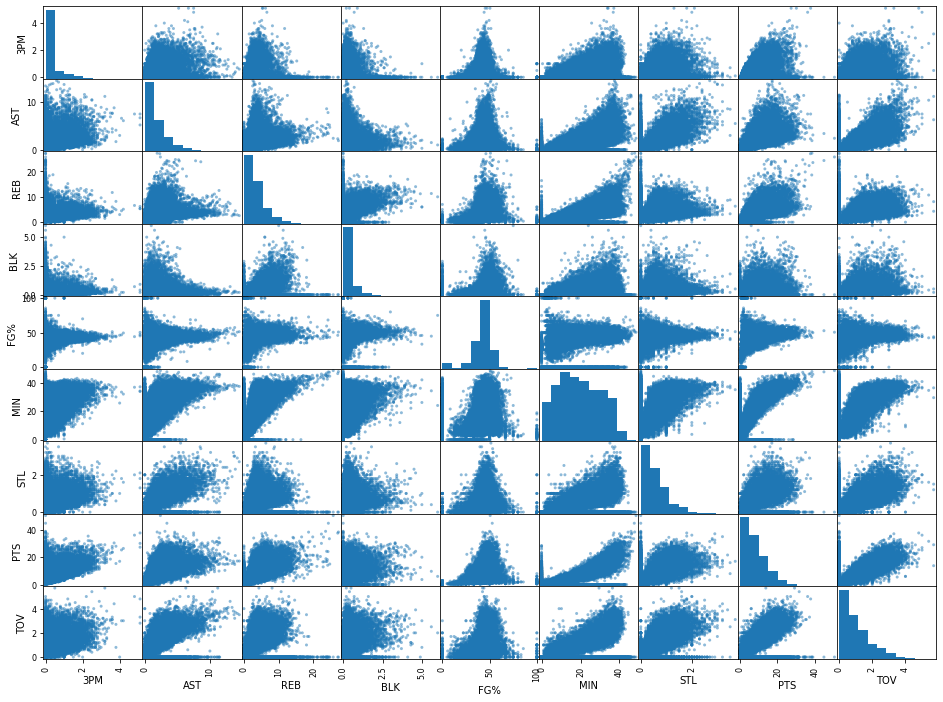

In [119]:
attributes = ['3PM', 'AST', 'REB', 'BLK', 'FG%', 'MIN', 'STL', 'PTS', 'TOV']
pd.plotting.scatter_matrix(players3[attributes], figsize=(16, 12))

In [120]:
# removing outliers
players3 = players3[(players3['MIN'] > 0)]

players_MVPS = players3[players3['MVP'] == 1]
players_NONMVPS = players3[players3['MVP'] == 0]

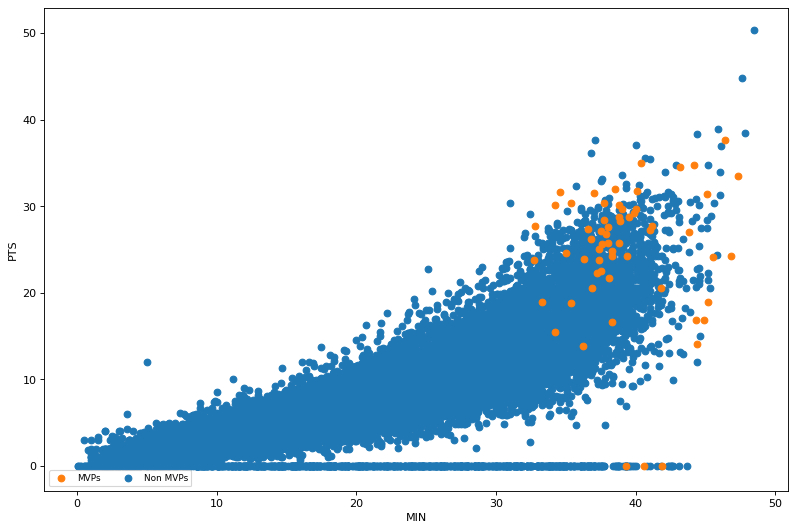

In [121]:
plt.figure(figsize=(12, 8), dpi=80)

plt_nonmvps = plt.scatter(players_NONMVPS['MIN'], players_NONMVPS['PTS'])
plt_mvps = plt.scatter(players_MVPS['MIN'], players_MVPS['PTS'])
plt.legend((plt_mvps, plt_nonmvps),
           ('MVPs', 'Non MVPs'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("MIN")
plt.ylabel("PTS")

plt.show()

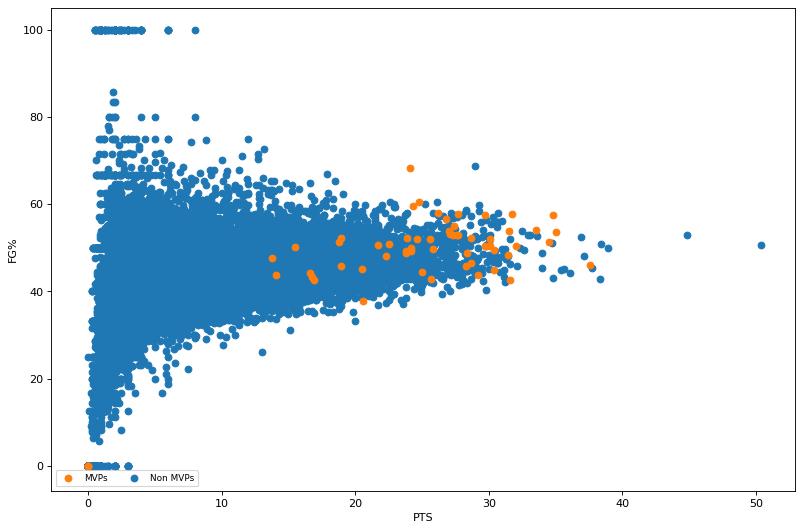

In [122]:
plt.figure(figsize=(12, 8), dpi=80)

plt_nonmvps = plt.scatter(players_NONMVPS['PTS'], players_NONMVPS['FG%'])
plt_mvps = plt.scatter(players_MVPS['PTS'], players_MVPS['FG%'])
plt.legend((plt_mvps, plt_nonmvps),
           ('MVPs', 'Non MVPs'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("PTS")
plt.ylabel("FG%")

plt.show()

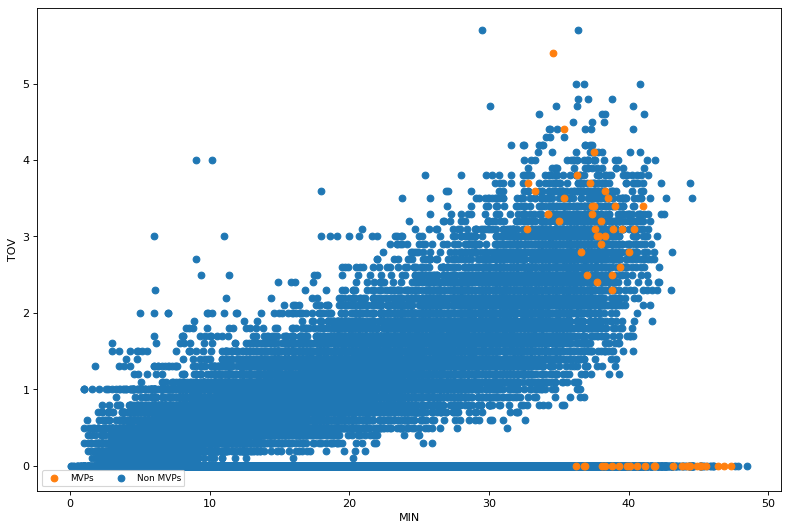

In [123]:
plt.figure(figsize=(12, 8), dpi=80)

plt_nonmvps = plt.scatter(players_NONMVPS['MIN'], players_NONMVPS['TOV'])
plt_mvps = plt.scatter(players_MVPS['MIN'], players_MVPS['TOV'])
plt.legend((plt_mvps, plt_nonmvps),
           ('MVPs', 'Non MVPs'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("MIN")
plt.ylabel("TOV")

plt.show()

In [124]:
players3[(players3['TOV'] == 0) & (players3['MVP'] == 1)]

,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name,MVP
35,0.0,0.0,0.0,0.0,3.9,3.2,0.0,10.0,57.9,18.7,...,3.2,26.2,13.3,1.2,1976-77,0.0,LAL,0.0,Kareem Abdul-Jabbar,1.0
36,0.0,0.0,0.0,0.0,5.0,4.1,0.0,13.5,52.9,21.1,...,3.6,27.7,16.9,1.5,1975-76,0.0,LAL,0.0,Kareem Abdul-Jabbar,1.0
38,0.0,0.0,0.0,0.0,4.8,3.5,0.0,11.0,53.9,21.7,...,2.9,27.0,14.5,1.4,1973-74,0.0,MIL,0.0,Kareem Abdul-Jabbar,1.0
40,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.0,57.4,24.9,...,2.9,34.8,16.6,0.0,1971-72,0.0,MIL,0.0,Kareem Abdul-Jabbar,1.0
41,0.0,0.0,0.0,0.0,3.3,0.0,0.0,0.0,57.7,22.5,...,3.2,31.7,16.0,0.0,1970-71,0.0,MIL,0.0,Kareem Abdul-Jabbar,1.0
4125,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,37.8,19.8,...,2.1,20.6,4.8,0.0,1956-57,0.0,BOS,0.0,Bob Cousy,1.0
4149,0.0,0.0,0.0,0.0,4.1,0.0,0.0,0.0,45.2,20.0,...,3.8,20.5,16.2,0.0,1972-73,0.0,BOS,0.0,Dave Cowens,1.0
12000,0.0,0.0,0.0,0.0,2.2,2.1,0.0,10.3,51.2,26.1,...,3.4,34.5,14.1,1.1,1974-75,0.0,BUF,0.0,Bob McAdoo,1.0
14941,0.0,0.0,0.0,0.0,3.1,0.0,0.0,0.0,43.8,22.8,...,2.8,29.2,16.4,0.0,1958-59,0.0,STL,0.0,Bob Pettit,1.0
14944,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,42.9,20.9,...,2.8,25.7,16.2,0.0,1955-56,0.0,STL,0.0,Bob Pettit,1.0


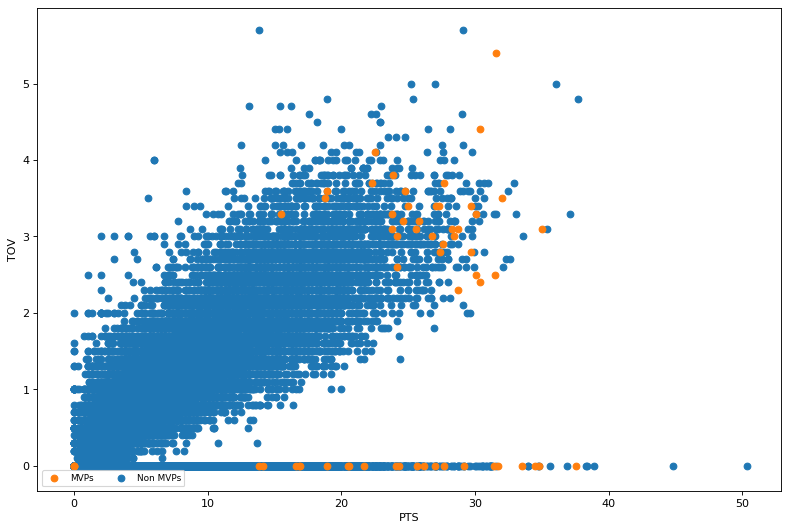

In [125]:
plt.figure(figsize=(12, 8), dpi=80)

plt_nonmvps = plt.scatter(players_NONMVPS['PTS'], players_NONMVPS['TOV'])
plt_mvps = plt.scatter(players_MVPS['PTS'], players_MVPS['TOV'])
plt.legend((plt_mvps, plt_nonmvps),
           ('MVPs', 'Non MVPs'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("PTS")
plt.ylabel("TOV")

plt.show()

In [126]:
print(f'MVPs: {len(players3[players3["MVP"] == 1])}')
print(f'No MVPs: {len(players3[players3["MVP"] == 0])}')

MVPs: 60
No MVPs: 23167


In [127]:
players_15 = players3[(players3['Season'] == '2014-15')]

players_MVPS = players_15[players_15['MVP'] == 1]
players_NONMVPS = players_15[players_15['MVP'] == 0]
players3[(players3['Season'] == '2014-15') & (players3['name'] == 'Stephen Curry')]

,+/-,3P%,3PA,3PM,AST,BLK,DD2,DREB,FG%,FGA,...,PF,PTS,REB,STL,Season,TD3,TEAM,TOV,name,MVP
22548,11.5,44.3,8.1,3.6,7.7,0.2,23.0,3.6,48.7,16.8,...,2.0,23.8,4.3,2.0,2014-15,0.0,GSW,3.1,Stephen Curry,1.0


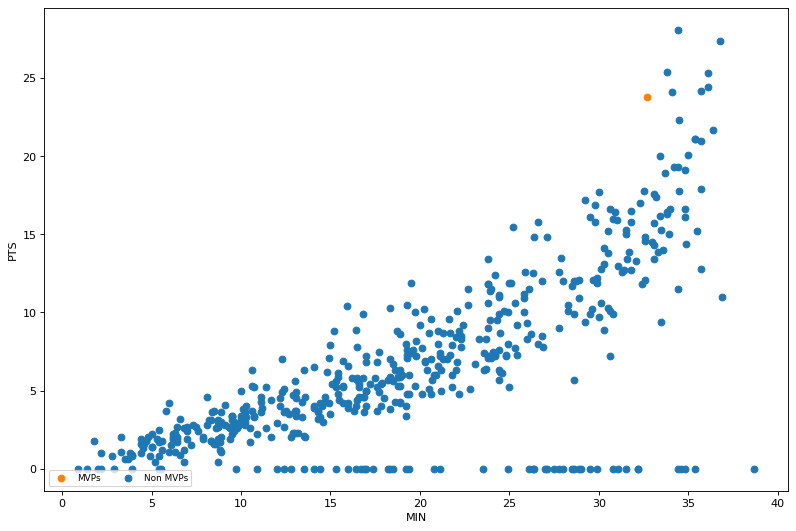

In [130]:
plt.figure(figsize=(12, 8), dpi=80)

plt_nonmvps = plt.scatter(players_NONMVPS['MIN'], players_NONMVPS['PTS'])
plt_mvps = plt.scatter(players_MVPS['MIN'], players_MVPS['PTS'])
plt.legend((plt_mvps, plt_nonmvps),
           ('MVPs', 'Non MVPs'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlabel("MIN")
plt.ylabel("PTS")

plt.show()

In [136]:
errors = players3[(players3['PTS'] == 0) & (players3['MIN'] > 10)]['name'].drop_duplicates(keep='first')

for error in errors:
    players_collection.remove({'name': {'$eq': error}})

/media/lucas/DATA/Repos/nba_scrapper/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.
